# Image Classification

- Nearest Neighbours Classifier
- k-nearest Neighbours Classifier
- Validation Set for Hyperparameter Tuning

> Image Classification is the task of assigning labels from a set of categories to an input image.

We can observe that a neural network with its hidden layers tried to learn the features which are eventually after going through all the activations assigned a class probability belonging to each category and the class with the highest probability is assigned as the label. This is how a classic supervised learning classification task works in general.

![alt-text](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/76_blog_image_1.png)<br/>
(Image Credit: SuperDataScience)

Challenges in Image Classification Tasks:

1. Viewpoint Variation: Different angles given to the camera pictures<br/>
![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/viewpoint_variation.jpg?token=AHIGNHWYZQNTXX3N4YO5HMK67WSLY)<br/>
2. Scale Variation: Different sizes given to the input image for better feature extraction
![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/scale_variation.jpg?token=AHIGNHWDAOR5SPO35KVJNQC67WSQU)<br/>
3. Deformation: Some objects can be disintegrated into a set of other objects<br/>
![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/deformation.jpeg?token=AHIGNHXZUM4N5QWLKYUH4DS67WSYY)<br/>
4. Occlusion: The part of objects can be visible sometimes too
![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/occlusion.jpg?token=AHIGNHXPLLPSYKJRLK33RZ267WS7O)<br/>
5. Illumination Conditions: The lighting variations on the image can also affect feature extraction
![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/lighting.jpeg?token=AHIGNHVTK5OKLAMPJU6DRUC67WTD6)<br/>
6. Background Clutter: The objects of interest may blend into the environment and it becomes harder to identify the object from the images<br/>
![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/clutter.jpg?token=AHIGNHVJYTDYVCB4OWRWSUS67WTOC)
7. Intra-Class Variation: The class of interest can be often relatively broad, with different objects having their own appearance.
![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/intra_class_variation.jpg?token=AHIGNHSKFYKOMH2GEBGCR5S67WTU2)

A quality classifier is immune to such variation and handle the intra-class variations such as aforementioned with ease. It is a difficult task to code the idea of recognizing objects in the images, hence instead of concentrating on graphically coding these images, we provide the computer with many images from which it can learn to identify features and then eventually recognize objects desirable and improve much more as we provide more data to it. This is called a **data driven approach**. 

A simple image classification pipeline is composed of:

![alt-text](https://raw.githubusercontent.com/vgaurav3011/Deep-Learning-Notes-and-Concepts/master/images/Module%201/image_classification_pipeline.png?token=AHIGNHR5G6ZUIOGDZGOWA3267WU5E)


1. Input: The labelled set of images with N images and K labels
2. Learning: We make use of the training data to make the model learn how to recognize features in the input data
3. Evaluation: We make use of the model to predict the labels for new images which it has not seen yet

So, before we proceed further, let us experiment with a few augmentation techniques using Computer Vision.







In [21]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
import urllib.request

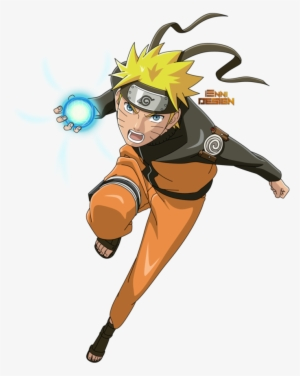

In [24]:
# Extract Image from a URL
url = "https://smallimg.pngkey.com/png/small/132-1327340_naruto-rasengan-png-naruto-shippuden-rasengan.png"
url_response = urllib.request.urlopen(url)
img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, -1)
cv2_imshow(img)

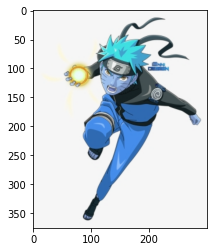

In [29]:
# When Matplotlibrary is used it has a default color scheme BGR, hence we need
# to convert the image to BGR from RGB
plt.imshow(img)

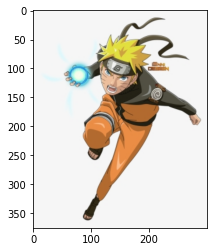

In [30]:
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img2)

In [31]:
height, width, dims= img.shape
print(height, width, dims)

376 300 3


(376, 300)


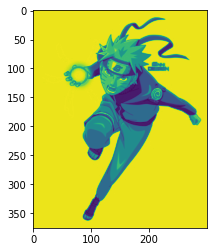

In [32]:
gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray.shape)
# Hence, the BGR scheme is needed for matplotlib
plt.imshow(gray)

In [33]:
# Scale Variation and Resizing
img= cv2.resize(img,(700,700))
img.shape

(700, 700, 3)

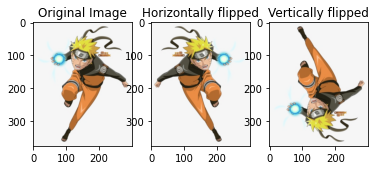

In [35]:
# Flipping of images

plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img2)

# Reverse the pixel columns on image
hflipped_image= np.fliplr(img2) 
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

# Reverse the pixel rows on image
vflipped_image= np.flipud(img2)
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

In [40]:
# Rotation of image
r_image = rotate(img2, angle=60) # angle value is positive for anticlockwise rotation 
r_image1 = rotate(img2, angle=-45) #angle value is negative for clockwise rotation

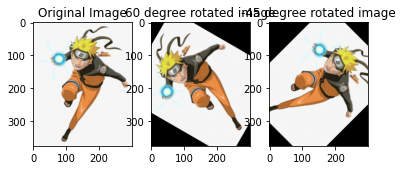

In [41]:
plt.subplot(131)
plt.imshow(img2)
plt.title("Original Image")
plt.subplot(132)
plt.imshow(r_image)
plt.title("60 degree rotated image")
plt.subplot(133)
plt.imshow(r_image1)
plt.title("-45 degree rotated image")
plt.show()

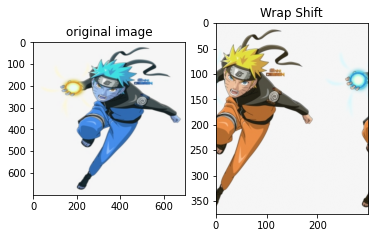

In [43]:
# Shifting Pixel Values in the image
transform = AffineTransform(translation=(-200,0))  # (-200,0) are coordinates
warp_image = warp(img2,transform, mode="wrap")
# mode= {'constant', 'edge', 'symmetric', 'reflect', 'wrap'}
#these are possible values of mode, you can try them and decide which one to use, 
# default value for mode is constant
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Wrap Shift')
plt.imshow(warp_image)

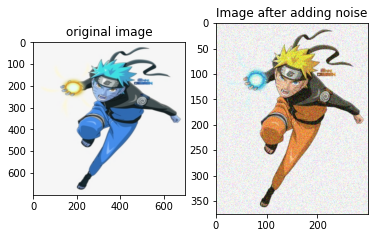

In [44]:
noisy_image= random_noise(img2)
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Image after adding noise')
plt.imshow(noisy_image)

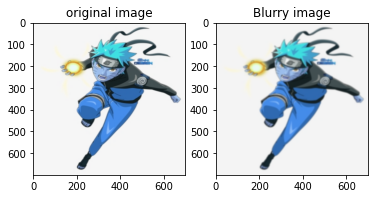

In [45]:
# Blurry images
blur_image= cv2.GaussianBlur(img, (11,11),0)
plt.subplot(1,2,1)
plt.title('original image')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('Blurry image')
plt.imshow(blur_image)

For more details on the open computer vision and its various approaches:
Refer to my blog: <a href="https://blog.glugmvit.com/opencv/">Link</a>